## **Clone Git**

---


Clone git agar dapat load data langsung dari git repository. Dataset yang digunakan didapat kan dari kaggle: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Ethereum.csv

In [1]:
!git clone https://github.com/ziszz/ethereum-price-predict.git

Cloning into 'ethereum-price-predict'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 83 (delta 5), reused 18 (delta 2), pack-reused 58
Unpacking objects: 100% (83/83), done.


## **Import Library**

---


Import beberapa library yang diperlukan untuk analisa data, visualisasi data dan melatih model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

## **Data Loading**

---



In [4]:
data_path = '/content/ethereum-price-predict/dataset/coin_Ethereum.csv'

df = pd.read_csv(data_path)
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


## **Exploratory Data** 

---

### **Deskripsi Variabel**

* Name: Nama mata uang kripto
* Symbol: Simbol mata uang kripto
* Date: Tanggal pencatatan data
* High : Harga tertinggi pada hari tertentu
* Low : Harga terendah pada hari tertentu
* Open : Harga pembukaan pada hari tertentu
* Close : Harga penutupan pada hari tertentu
* Volume : Volume transaksi pada hari tertentu
* Mastercap : Kapitalisasi pasar dalam USD

### **Mengecek informasi pada data**

Melakukan pengecekan apakah terdapat missing value pada data dan kesesuaian tipe data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


Dapat dilihat bahwa tidak terdapat missing value pada dataset

### **Informasi Statistik**
Data di atas memiliki beberapa informasi statistik pada masing-masing kolom, antara lain:

* count adalah jumlah sampel pada data.
* mean adalah nilai rata-rata.
* std adalah standar deviasi.
* min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum





In [6]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


Dapat dilihat pada visualisasi data dibawah. Terdapat banyak data outlier pada masing masing kolom data.

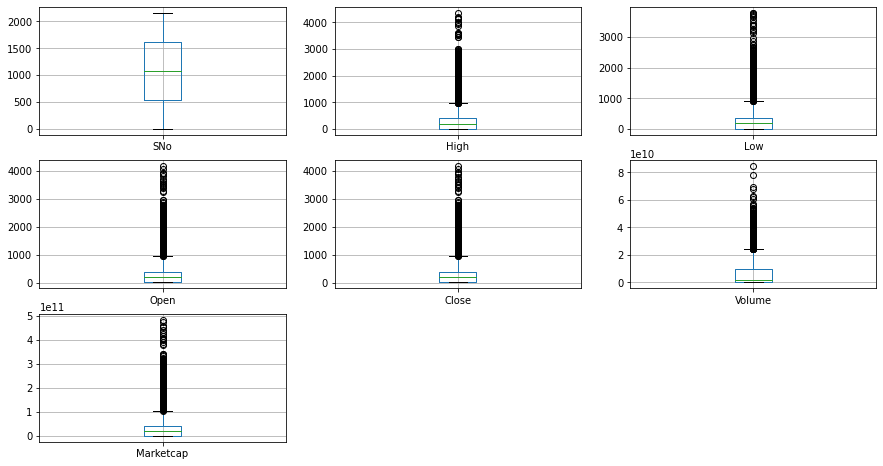

In [11]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  df.boxplot(column=col)

Terdapat beberapa teknik untuk mengatasi outlier pada data. Pada project ini akan menerapkan teknik IQR Method yaitu dengan menghapus data yang berada diluar interquartile range. Interquartile merupakan range diantara kuartil pertama(25%) dan kuartil ketiga(75%).

In [12]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)

IQR = Q3 - Q1

bot_treshold = Q1 - 1.5 * IQR
top_treshold = Q3 + 1.5 * IQR

df = df[~((df < bot_treshold) | (df > top_treshold)).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


(1918, 10)

### **Univariate Analysis**
Karena target prediksi dari dataset ini ada pada fitur Close_Price yang merupakan harga crypto coin Ethereum, jadi hanya fokus menganalisis korelasi data pada feature tersebut. Dari hasil visualisasi data dibawah dapat disimpulkan bahwa peningkatan harga crypto coin ethereum sebanding dengan penurunan jumlah sampel data.

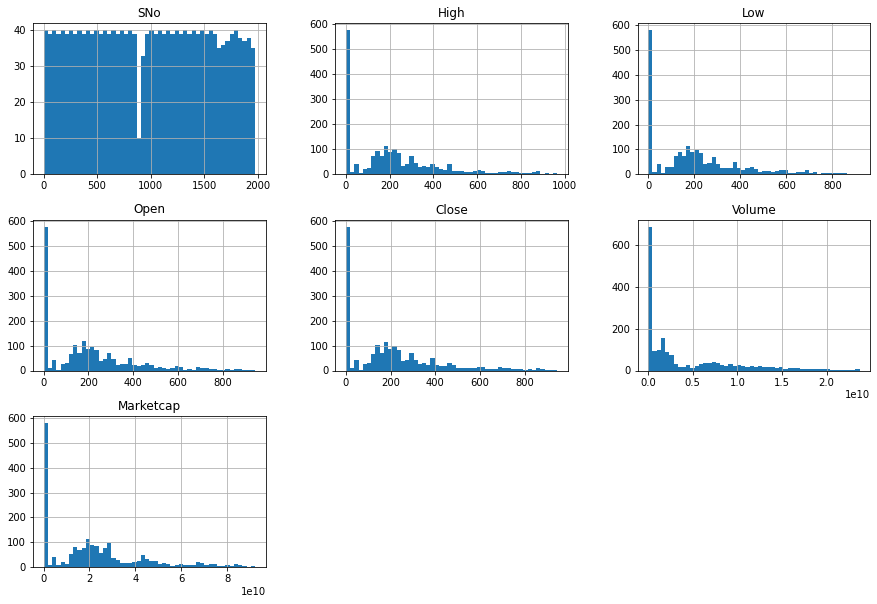

In [13]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

### **Multivariate Analysis**
Jika di lihat dari visualisasi data dibawah. Fitur Close pada sumbu y memiliki korelasi dengan data pada fitur High, Low, Open, dan Marketcap. Korelasi yang terdapat pada data-data tersebut merupakan korelas yang tinggi, sedangkan untuk fitur Volume terlihat memiliki korelasi yang cukup lemah karena sebaran datanya tidak membentuk pola.

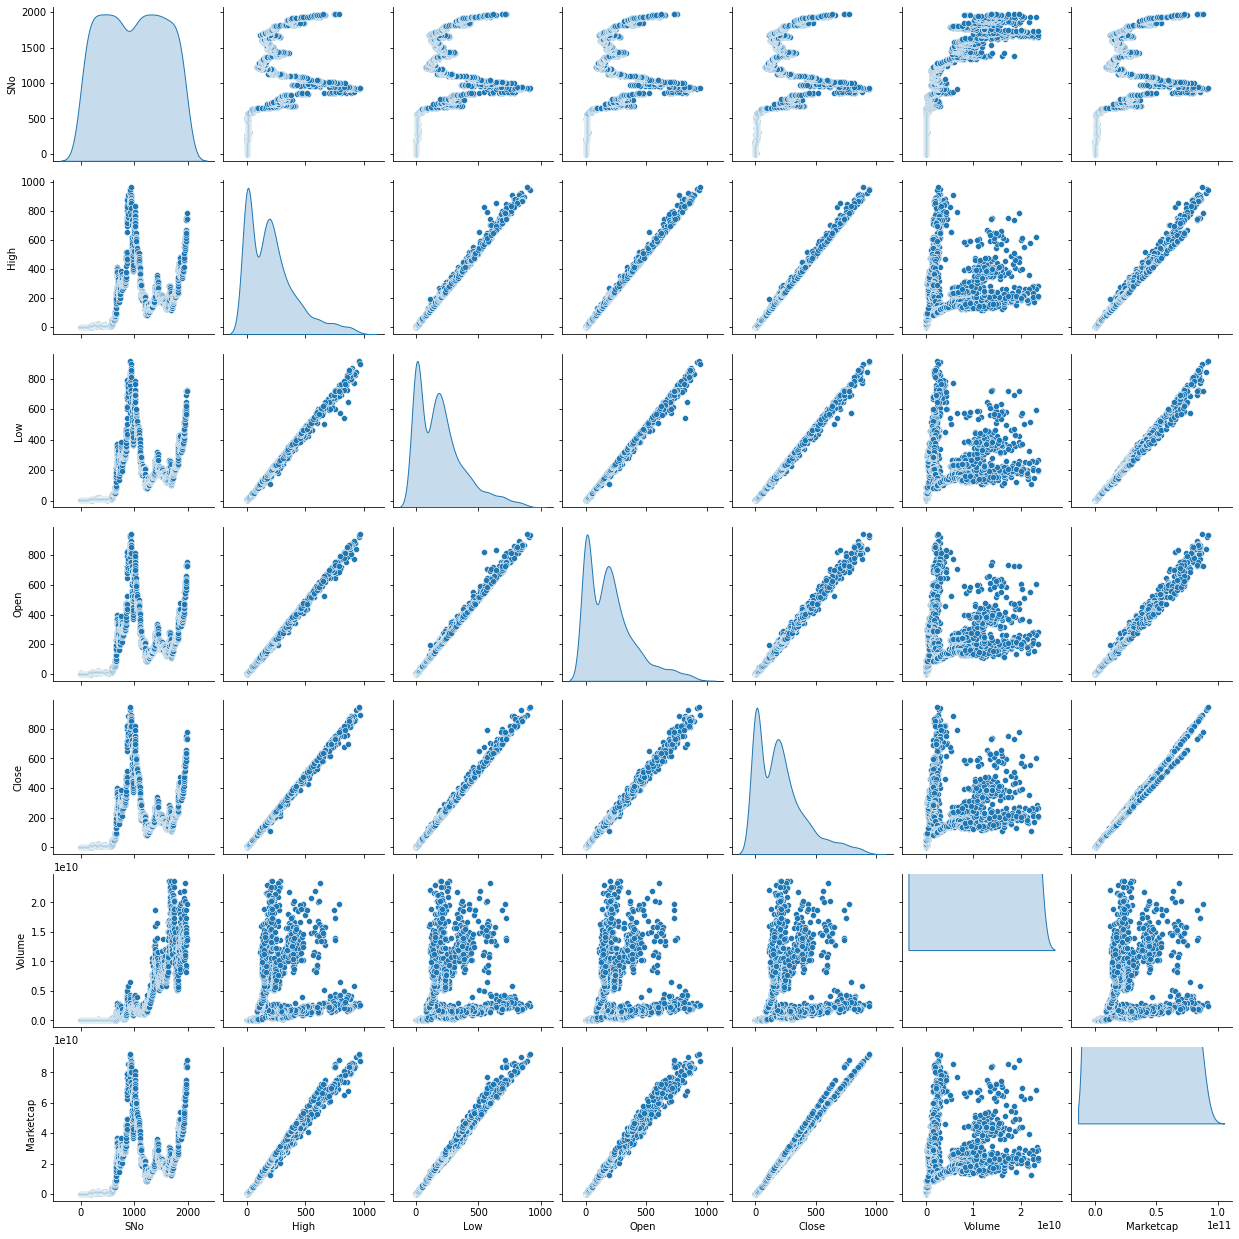

In [14]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

Untuk lebih jelasnya dapat dilihat melalui visualisasi dibawah yang menunjukkan skor korelasi di tiap fitur dengan fitur Close. Pada fitur High, Low, Open dan Marketcap memiliki skor korelasi yang terbilang tinggi yaitu di atas 0.9. Sedangkan pada fitur Volume memiliki skor korelasi yang cukup rendah yaitu 0.38. Sehingga fitur Volume ini dapat didrop dari dataset.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

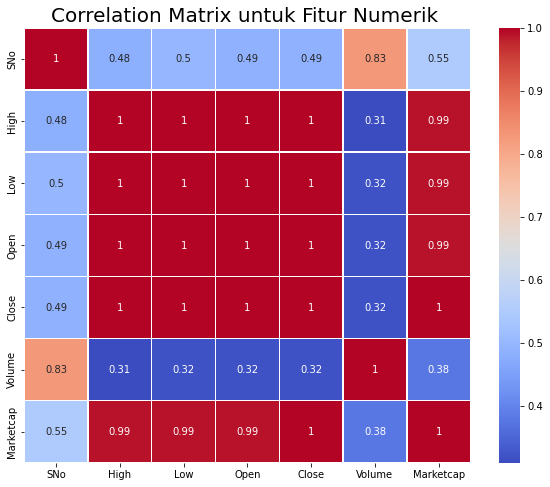

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [16]:
df.drop(['Volume'], axis=1, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SNo,Name,Symbol,Date,High,Low,Open,Close,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,7.364501e+07
...,...,...,...,...,...,...,...,...,...
1970,1971,Ethereum,ETH,2020-12-29 23:59:59,737.952903,692.149438,730.358684,731.520119,8.342033e+10
1971,1972,Ethereum,ETH,2020-12-30 23:59:59,754.303234,720.988875,731.472845,751.618972,8.572258e+10
1972,1973,Ethereum,ETH,2020-12-31 23:59:59,754.299440,726.511908,751.626643,737.803398,8.415681e+10
1973,1974,Ethereum,ETH,2021-01-01 23:59:59,749.201859,719.792258,737.708378,730.367569,8.331854e+10


## **Data Preparation**

---

### **Menghapus data yang tidak diperlukan dan merubah nama column**

Kolom data seperti (SNo, Name, Symbol, Date) tidak diperlukan untuk pelatihan, karena data tersebut akan mengganggu model dalam mempelajari data. Karena isi dari data tersebut tidak memiliki value yang berarti untuk dipelajari oleh model. Lalu, mengubah nama kolom High, Low, Open, Close menjadi nama kolom yang dapat lebih dipahami.


In [17]:
unused_columns = ['SNo', 'Name', 'Symbol', 'Date']
renamed_columns = {'High': 'High_Price', 'Low': 'Low_Price', 
                   'Open': 'Open_Price', 'Close': 'Close_Price'}

df.drop(unused_columns, axis=1, inplace=True)
df.rename(columns=renamed_columns, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,High_Price,Low_Price,Open_Price,Close_Price,Marketcap
0,2.798810,0.714725,2.793760,0.753325,4.548689e+07
1,0.879810,0.629191,0.706136,0.701897,4.239957e+07
2,0.729854,0.636546,0.713989,0.708448,4.281836e+07
3,1.131410,0.663235,0.708087,1.067860,6.456929e+07
4,1.289940,0.883608,1.058750,1.217440,7.364501e+07
...,...,...,...,...,...
1970,737.952903,692.149438,730.358684,731.520119,8.342033e+10
1971,754.303234,720.988875,731.472845,751.618972,8.572258e+10
1972,754.299440,726.511908,751.626643,737.803398,8.415681e+10
1973,749.201859,719.792258,737.708378,730.367569,8.331854e+10


### **Split dataset**
Membagi dataset menjadi data training dan data testing

In [18]:
x = df.drop(['Close_Price'], axis=1).values
y = df['Close_Price'].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=1)

print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 1918
Total # of sample in train dataset: 1726
Total # of sample in test dataset: 192


### **Normalisasi data**
Melakukan transformasi pada data fitur fitur yang akan dipelajari oleh model menggunakan library MinMaxScaler. MinMaxScaler mentransformasikan fitur dengan menskalakan setiap fitur ke rentang tertentu. Library ini menskalakan dan mentransformasikan setiap fitur secara individual sehingga berada dalam rentang yang diberikan pada set pelatihan, pada library ini memiliki range default antara nol dan satu.

In [19]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [20]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'],
                      index=['KNN', 'RandomForest', 'SVR'])

## **Model Development**

---


### **Grid Search**
Grid search memungkinkan untuk menguji beberapa parameter sekaligus pada sebuah model. Dengan menerapkan teknik ini kita dapat melihat performa model terbaik dengan parameter tertentu. 


In [21]:
svr = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}

grid_search = GridSearchCV(svr, parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100000, 'gamma': 0.5, 'kernel': 'rbf'}
0.9993510583287847


In [22]:
knn = KNeighborsRegressor()
parameters =  {
    'n_neighbors': range(10, 50, 10),
}

grid_search = GridSearchCV(knn, parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 10}
0.9984321138190955


In [23]:
rf = RandomForestRegressor()
parameters =  {
    'n_estimators': range(10, 50, 10),
    'max_depth': [16, 32, 64],
}

grid_search = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 32, 'n_estimators': 40}
0.9988468802652501


### **Training Model**
**Support Vector Machine**

In [24]:
svr = SVR(C=100000, gamma=0.5, kernel='rbf')                          
svr.fit(x_train, y_train)

SVR(C=100000, gamma=0.5)

**K-Nearest Neighbours**

In [25]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

**Random Forest**

In [26]:
rf = RandomForestRegressor(n_estimators=40, max_depth=64)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=64, n_estimators=40)

### **Model Evaluation**

In [27]:
x_test = scaler.transform(x_test)

In [28]:
model_dict = {'KNN': knn, 'RandomForest': rf, 'SVR': svr}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train)) / 1e3 
  models.loc[name, 'test_mse'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test)) / 1e3 

models

,train_mse,test_mse
KNN,0.044958,0.077763
RandomForest,0.006535,0.031671
SVR,0.022832,0.016998


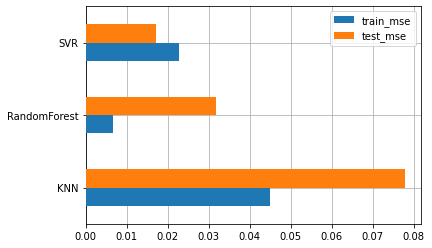

In [29]:
fig, ax = plt.subplots()
models.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [30]:
test_data = x_test[:3].copy()
predictions = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    predictions['prediction_' + name] = model.predict(test_data).round(3)
 
pd.DataFrame(predictions)

,y_true,prediction_KNN,prediction_RandomForest,prediction_SVR
0,0.736223,0.794,0.735,0.794
1,230.768000,226.908,229.095,228.806
2,155.638589,154.957,156.034,159.236


Dari ketiga model yang digunakan. Terlihat bahwa hampir semua model yang digunakan memiliki hasil prediksi mendekati dengan hasil yang sebenarnya, tetapi prediksi dengan Random Forest memberikan hasil prediksi yang paling mendekati.